In [3]:
import numpy as npy
import pandas as pds
import statsmodels.api as stm
import statsmodels.formula.api as stf
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import seaborn as sns

# grab the data
smokingdata = pds.read_csv("D:\Data\Spring23\AppliedML-JP\Lecture 4\BWGHT.csv")
df= smokingdata
#print the whole set of data
print (df)


      faminc  cigtax  cigprice  bwght  fatheduc  motheduc  parity  male  \
0       13.5    16.5     122.3    109      12.0      12.0       1     1   
1        7.5    16.5     122.3    133       6.0      12.0       2     1   
2        0.5    16.5     122.3    129       NaN      12.0       2     0   
3       15.5    16.5     122.3    126      12.0      12.0       2     1   
4       27.5    16.5     122.3    134      14.0      12.0       2     1   
...      ...     ...       ...    ...       ...       ...     ...   ...   
1383    27.5    30.0     138.3    110      12.0      12.0       4     1   
1384     5.5    30.0     138.3    146       NaN      16.0       2     1   
1385    65.0     8.0     118.6    135      18.0      16.0       2     0   
1386    27.5     8.0     118.6    118       NaN      14.0       2     0   
1387    37.5     8.0     118.6    111      16.0      13.0       2     0   

      white  cigs    lbwght  bwghtlbs  packs   lfaminc  
0         1     0  4.691348    6.8125    0

In [3]:
#print the whole set of data
print(df)

      faminc  cigtax  cigprice  bwght  fatheduc  motheduc  parity  male  \
0       13.5    16.5     122.3    109      12.0      12.0       1     1   
1        7.5    16.5     122.3    133       6.0      12.0       2     1   
2        0.5    16.5     122.3    129       NaN      12.0       2     0   
3       15.5    16.5     122.3    126      12.0      12.0       2     1   
4       27.5    16.5     122.3    134      14.0      12.0       2     1   
...      ...     ...       ...    ...       ...       ...     ...   ...   
1383    27.5    30.0     138.3    110      12.0      12.0       4     1   
1384     5.5    30.0     138.3    146       NaN      16.0       2     1   
1385    65.0     8.0     118.6    135      18.0      16.0       2     0   
1386    27.5     8.0     118.6    118       NaN      14.0       2     0   
1387    37.5     8.0     118.6    111      16.0      13.0       2     0   

      white  cigs    lbwght  bwghtlbs  packs   lfaminc  
0         1     0  4.691348    6.8125    0

In [4]:
df.head()
#prints the first five rows of data

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.3,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.3,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.3,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.3,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.3,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


In [6]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.keys()

Index(['faminc', 'cigtax', 'cigprice', 'bwght', 'fatheduc', 'motheduc',
       'parity', 'male', 'white', 'cigs', 'lbwght', 'bwghtlbs', 'packs',
       'lfaminc'],
      dtype='object')

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   faminc    1388 non-null   float64
 1   cigtax    1388 non-null   float64
 2   cigprice  1388 non-null   float64
 3   bwght     1388 non-null   int64  
 4   fatheduc  1192 non-null   float64
 5   motheduc  1387 non-null   float64
 6   parity    1388 non-null   int64  
 7   male      1388 non-null   int64  
 8   white     1388 non-null   int64  
 9   cigs      1388 non-null   int64  
 10  lbwght    1388 non-null   float64
 11  bwghtlbs  1388 non-null   float64
 12  packs     1388 non-null   float64
 13  lfaminc   1388 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 151.9 KB


In [8]:
df.isnull()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1384,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1385,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1386,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [9]:
df.count()

faminc      1388
cigtax      1388
cigprice    1388
bwght       1388
fatheduc    1192
motheduc    1387
parity      1388
male        1388
white       1388
cigs        1388
lbwght      1388
bwghtlbs    1388
packs       1388
lfaminc     1388
dtype: int64

In [62]:
df=df.dropna()

In [63]:
df.count()

faminc      1191
cigtax      1191
cigprice    1191
bwght       1191
fatheduc    1191
motheduc    1191
parity      1191
male        1191
white       1191
cigs        1191
lbwght      1191
bwghtlbs    1191
packs       1191
lfaminc     1191
dtype: int64

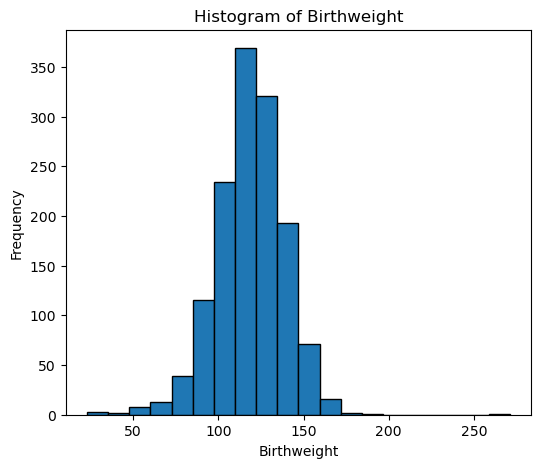

In [30]:
plt.figure(figsize=(6, 5))
plt.hist(df['bwght'], bins=20, edgecolor='black')
plt.xlabel('Birthweight')
plt.ylabel('Frequency')
plt.title('Histogram of Birthweight')
plt.show()

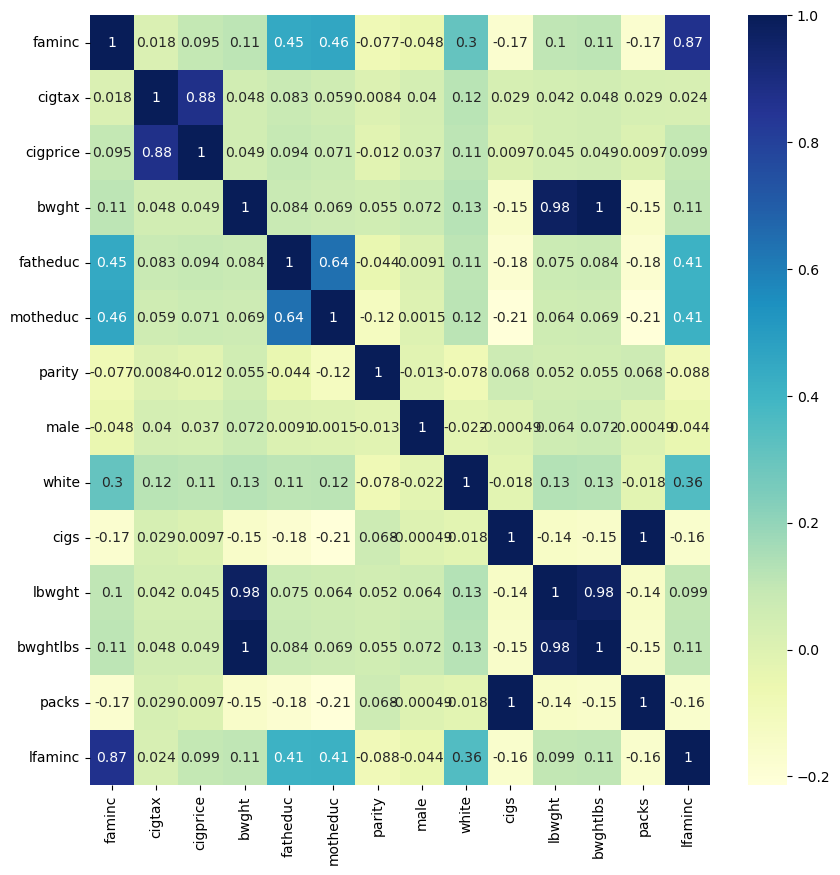

In [22]:
plt.figure(figsize=(10, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

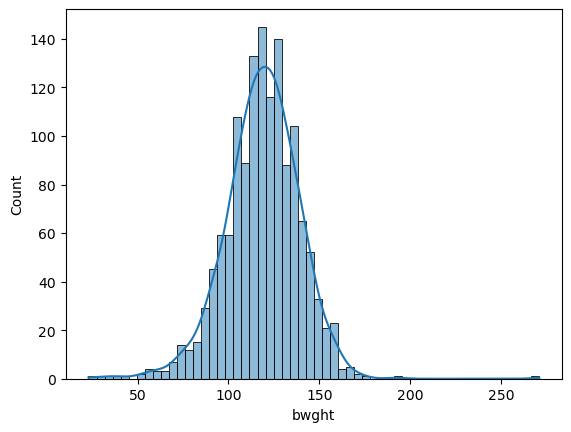

In [24]:
sns.histplot(df['bwght'], kde=True)
plt.show()

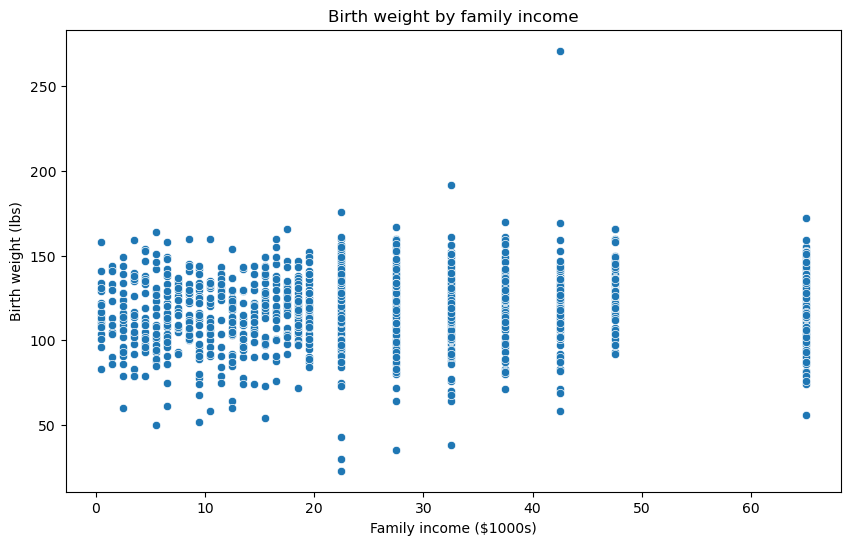

In [25]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='faminc', y='bwght', data=df)
plt.title('Birth weight by family income')
plt.xlabel('Family income ($1000s)')
plt.ylabel('Birth weight (lbs)')
plt.show()


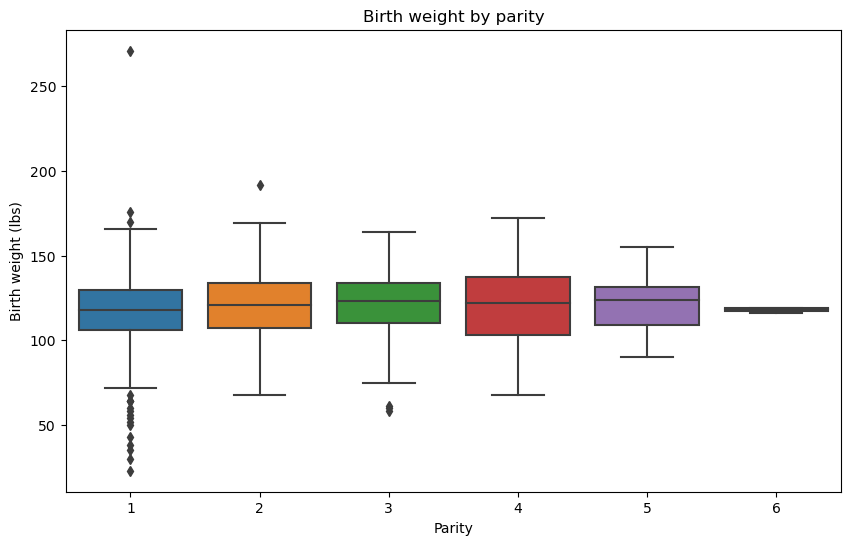

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parity', y='bwght', data=df)
plt.title('Birth weight by parity')
plt.xlabel('Parity')
plt.ylabel('Birth weight (lbs)')
plt.show()

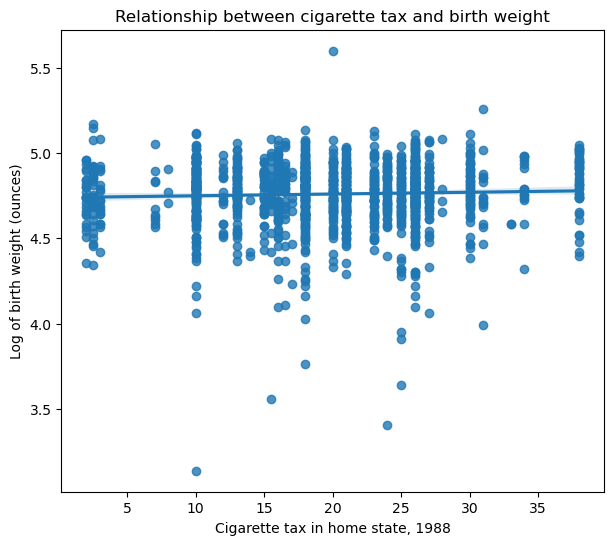

In [29]:
plt.figure(figsize=(7 ,6))
sns.regplot(x='cigtax', y='lbwght', data=df)
plt.title('Relationship between cigarette tax and birth weight')
plt.xlabel('Cigarette tax in home state, 1988')
plt.ylabel('Log of birth weight (ounces)')
plt.show()

Text(0, 0.5, 'Frequency')

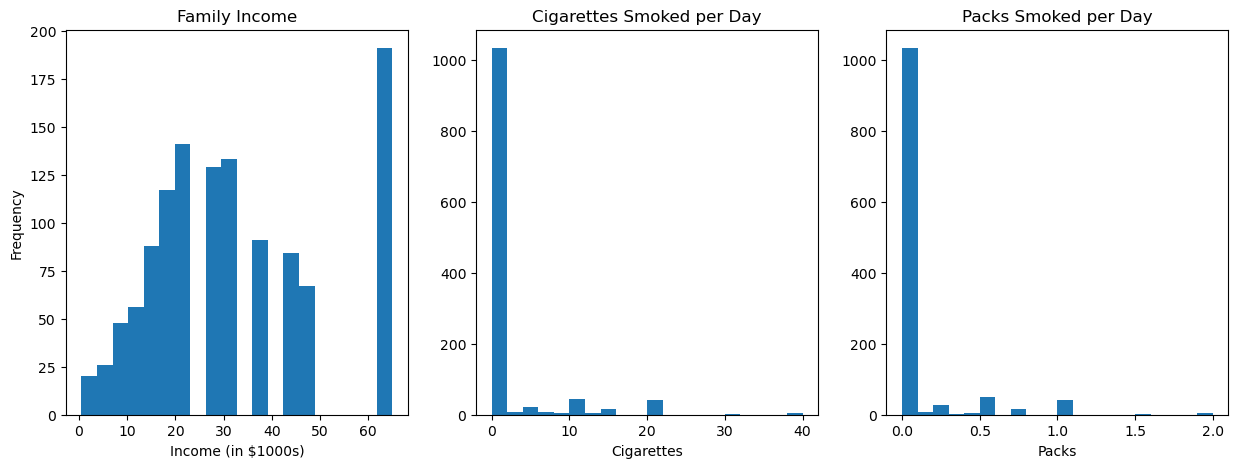

In [64]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(df['faminc'], bins=20)
axs[1].hist(df['cigs'], bins=20)
axs[2].hist(df['packs'], bins=20)

axs[0].set_title('Family Income')
axs[1].set_title('Cigarettes Smoked per Day')
axs[2].set_title('Packs Smoked per Day')
axs[0].set_xlabel('Income (in $1000s)')
axs[1].set_xlabel('Cigarettes')
axs[2].set_xlabel('Packs')
axs[0].set_ylabel('Frequency')

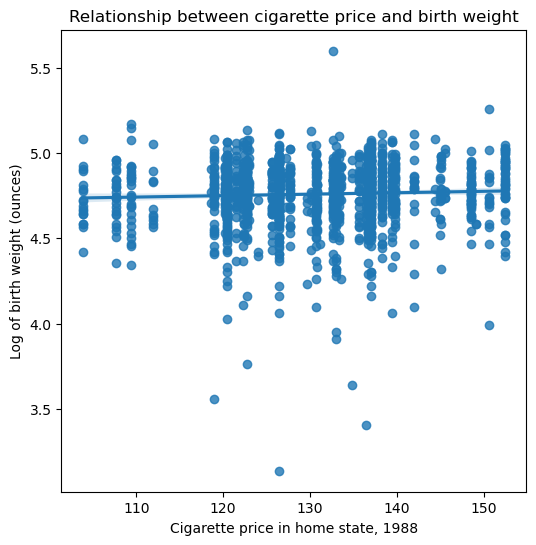

In [33]:
plt.figure(figsize=(6, 6))
sns.regplot(x='cigprice', y='lbwght', data=df)
plt.title('Relationship between cigarette price and birth weight')
plt.xlabel('Cigarette price in home state, 1988')
plt.ylabel('Log of birth weight (ounces)')
plt.show()

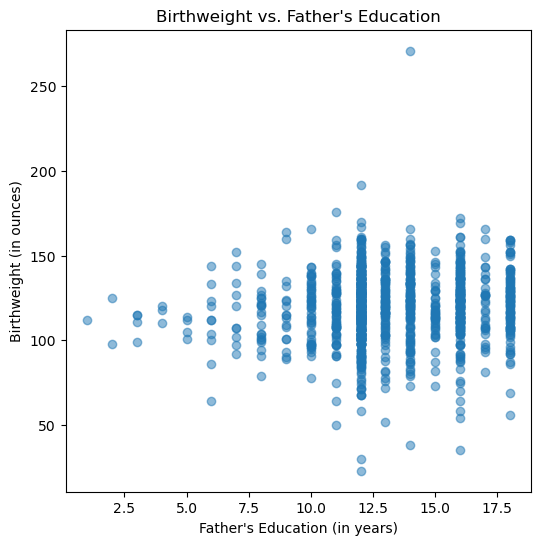

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(df['fatheduc'], df['bwght'], alpha=0.5)
plt.title("Birthweight vs. Father's Education")
plt.xlabel("Father's Education (in years)")
plt.ylabel("Birthweight (in ounces)")
plt.show()


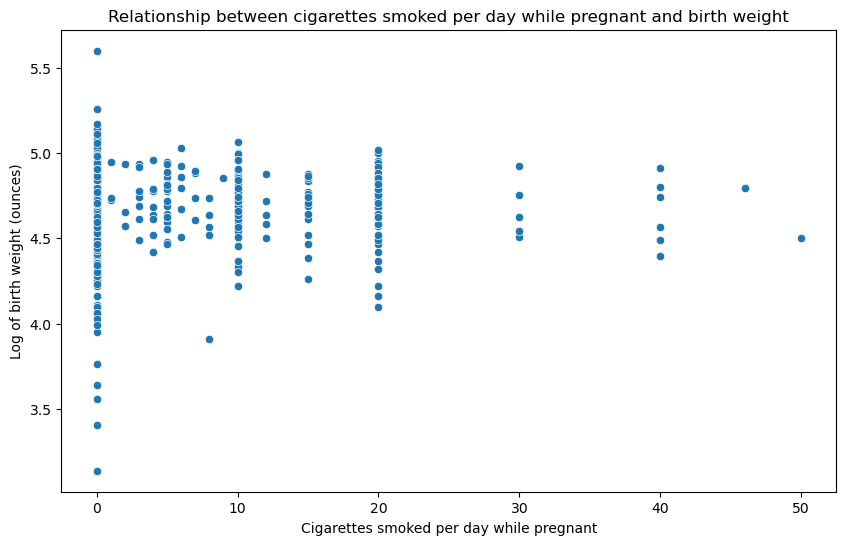

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cigs', y='lbwght', data=df)
plt.title('Relationship between cigarettes smoked per day while pregnant and birth weight')
plt.xlabel('Cigarettes smoked per day while pregnant')
plt.ylabel('Log of birth weight (ounces)')
plt.show()

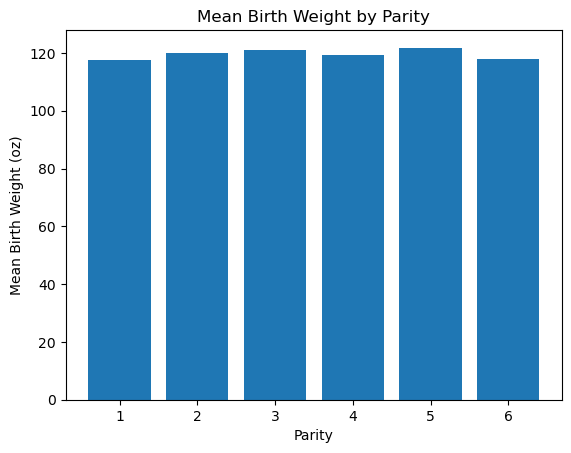

In [52]:

mean_bwght_by_parity = df.groupby('parity')['bwght'].mean()


plt.bar(mean_bwght_by_parity.index, mean_bwght_by_parity.values)
plt.title('Mean Birth Weight by Parity')
plt.xlabel('Parity')
plt.ylabel('Mean Birth Weight (oz)')
plt.show()

In [75]:
X = df[['faminc','cigtax', 'cigprice', 'fatheduc', 'motheduc', 'parity', 'male', 'white', 'cigs', 'packs']]
X = stm.add_constant(X) 
y = df['bwght']


model = stm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     7.678
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           5.02e-11
Time:                        21:17:22   Log-Likelihood:                -5231.9
No. Observations:                1191   AIC:                         1.048e+04
Df Residuals:                    1181   BIC:                         1.053e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.1152     13.482      8.242      0.0

In [ ]:
In this is an OLS regression model with a dependent variable of "bwght" (birth weight) and 9 independent variables. 
The model has an R-squared of 0.055, indicating that only a small proportion of the variation in birth weight is explained by the independent variables. 
Some of the independent variables, such as "male", "white", "parity", "cigs", and "packs", are statistically significant at the 5% level and have coefficients with negative values, suggesting that they have a negative effect on birth weight. 

In [76]:
X = df[['faminc','cigtax', 'cigprice', 'fatheduc', 'motheduc', 'parity', 'male', 'white', 'cigs', 'lfaminc','lbwght', 'packs']]
X = stm.add_constant(X) 
y = df['bwght']

model = stm.OLS(y, X).fit()
print(model.summary())

print(y.shape)
print(X.shape)

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1900.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:17:40   Log-Likelihood:                -3521.1
No. Observations:                1191   AIC:                             7066.
Df Residuals:                    1179   BIC:                             7127.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -376.2783      4.762    -79.023      0.0

In [ ]:
In this is an OLS regression model with 11 predictor variables and one dependent variable, "bwght". When log of family income, log of birthweight is added to the model has prediction as compare to previous one.